In [2]:
"""
Notebook to produce figures in GW230529_181500 discovery publication

Part of the data release: https://zenodo.org/record/10845779

Author: Shanika Galaudage on behalf of the LIGO Scientific Collaboration, Virgo Collaboration and KAGRA Collaboration

This software is provided under license: Creative Commons Attribution 4.0
International (https://creativecommons.org/licenses/by/4.0/legalcode) and is provided as-is.

"""
# Import packages
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio") # Turn off some warnings
import numpy as np
from scipy.stats import gaussian_kde
from pesummary.io import read
import matplotlib.pyplot as plt

# Set style of plots
plt.style.use("fig_publication.mplstyle")

# Set colors for plots
COLORS_DICT = {
    "teal"   : "#00707e",
    "gray"   : "#b0a8a8",
    "blue"   : "#00b9f2",
    "orange" : "#f2a02a",
    "red"    : "#f94730",
    "green"  : "#c6de81",
    "pink"   : "#f8b7c9",
    "navy"   : "#1c4484",
    "black"  : "#0f0101",
}

# Figure widths in line with journal guidelines
FIG_SIZES = {
    "1col_rec"      : (3.39, 2.64),
    "1col_squ"      : (3.39, 3.39),
    "2col_rec"      : (7.10, 2.64),
    "2col_2squ"     : (7.10, 3.39),
    "1col_2row_rec" : (3.39, 2.64*1.85),
    "2col_2row_rec" : (7.10, 2.64*1.85),
}

# Linewidths must be >0.5 to fit journal specs
LINEWIDTHS = {
    "interval" : 0.7,
    "curve"    : 0.9,
    "line"     : 0.6,
}

# Lower and upper limits in credible intervals 
CONFIDENCE_LIMITS = {
    "lower_bound" : 5,
    "median"      : 50,
    "upper_bound" : 95,
}

# Levels used for contours
CONTOUR_LEVELS = {
    "min" : 0.0,
    "mid" : 0.5,
    "max" : 0.9,
}

# Display plots
%matplotlib inline 

# Define paths
fig_dir  = "/Users/marcsalinas/Desktop/LIGO/"
data_dir = "/Users/marcsalinas/Desktop/LIGO/"

# Path to parameter estimation results of GW230529 for various waveforms
res_gw230529 = data_dir + "posterior_samples.h5"

/Users/marcsalinas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


2024-05-29  18:00:55 PESummary WARNING : Tidal deformability parameters found in the posterior table but they are all exactly 0. Assuming this is a BBH system.
2024-05-29  18:00:55 PESummary WARNING : Posterior samples for lambda_1 and lambda_2 found in the posterior table but lambda_1 is always exactly 0. Assuming this is an NSBH system.
2024-05-29  18:00:55 PESummary INFO    : Skipping remnant calculations as tidal deformability parameters found in the posterior table.
2024-05-29  18:00:59 PESummary INFO    : Skipping remnant calculations as tidal deformability parameters found in the posterior table.
2024-05-29  18:01:21 PESummary WARNING : Tidal deformability parameters found in the posterior table but they are all exactly 0. Assuming this is a BBH system.
2024-05-29  18:01:21 PESummary WARNING : Posterior samples for lambda_1 and lambda_2 found in the posterior table but lambda_1 is always exactly 0. Assuming this is an NSBH system.
findfont: Generic family 'serif' not found becau

<Figure size 339x339 with 0 Axes>

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


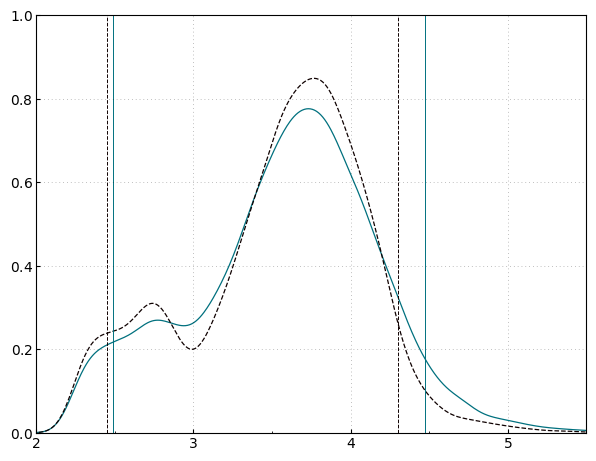

In [9]:
"""
Figure 2: Spin Projections

Posterior distributions for the primary mass, the mass ratio, and the spin component
parallel to the orbital angular momentum of the binary.

"""
gw230529 = read(res_gw230529)
fig = plt.figure(figsize=FIG_SIZES["1col_squ"])

color_per_spin = {
    "high_spin" : COLORS_DICT["teal"],
    "low_spin"  : COLORS_DICT["black"],
}
# Load samples into dictionary (uses combined IMRPhenomXPHM and SEOBNRv5PHM high spin samples)
samples = {
    "high_spin" : gw230529.samples_dict["Combined_PHM_highSpin"],
    "low_spin"  : gw230529.samples_dict["Combined_PHM_lowSecondarySpin"],
}

# Evaluate KDE
kde_mass_high  = gaussian_kde(samples["high_spin"]["mass_1_source"])
kde_mass_low   = gaussian_kde(samples["low_spin"]["mass_1_source"])

# Set parameters and plot kwargs
param_names  = ["mass_1_source"]
param_labels = ["m1"]

direction  = "in"
smoothing  = 1.8
nbins      = 60

# Plot high spin secondary samples
fig, ax = plt.subplots()

# Set plot limits
m1min, m1max       = 1.5, 8.0

# Create bins to plot a smooth 1D PDF
npoints = 1000
m1s    = np.linspace(m1min, m1max, npoints)

# Plot KDEs
fig.get_axes()[0].plot(m1s,     kde_mass_high(m1s),     color = color_per_spin["high_spin"], linestyle="-",   linewidth=LINEWIDTHS["curve"])
fig.get_axes()[0].plot(m1s,     kde_mass_low(m1s),      color = color_per_spin["low_spin"],  linestyle="--" , linewidth=LINEWIDTHS["curve"])

with open("mass_hs_data.txt", 'w') as file:
    for i in range(npoints):
        file.write(f"{m1s[i]}  {kde_mass_high(m1s[i])[0]} \n")

with open("mass_ls_data.txt", 'w') as file:
    for i in range(npoints):
        file.write(f"{m1s[i]}  {kde_mass_low(m1s[i])[0]} \n")

# Add 90% credible intervals on 1D distributions
high_spin_lower = [np.percentile(samples["high_spin"][key], CONFIDENCE_LIMITS["lower_bound"]) for key in param_names]
high_spin_upper = [np.percentile(samples["high_spin"][key], CONFIDENCE_LIMITS["upper_bound"]) for key in param_names]
low_spin_lower  = [np.percentile(samples["low_spin"][key],  CONFIDENCE_LIMITS["lower_bound"]) for key in param_names] 
low_spin_upper  = [np.percentile(samples["low_spin"][key],  CONFIDENCE_LIMITS["upper_bound"]) for key in param_names] 

fig.get_axes()[0].axvline(high_spin_lower[0], linestyle="-",  color = color_per_spin["high_spin"], linewidth=LINEWIDTHS["interval"])
fig.get_axes()[0].axvline(high_spin_upper[0], linestyle="-",  color = color_per_spin["high_spin"], linewidth=LINEWIDTHS["interval"])
fig.get_axes()[0].axvline(low_spin_lower[0],  linestyle="--", color = color_per_spin["low_spin"],  linewidth=LINEWIDTHS["interval"])
fig.get_axes()[0].axvline(low_spin_upper[0],  linestyle="--", color = color_per_spin["low_spin"],  linewidth=LINEWIDTHS["interval"])

# Set ticks
m1ticks           = [2., 3., 4., 5.]
m1ticks_minor     = [2.5, 3.5, 4.5, 5.5, 6.5]

# m1 1D distribution
fig.get_axes()[0].set_xticks(m1ticks)
fig.get_axes()[0].set_xticks(m1ticks_minor, minor=True)
fig.get_axes()[0].tick_params(which="major", direction=direction, bottom=True)

# Tune x and y limits
m1_min, m1_max       =  2.0,  5.5

fig.get_axes()[0].set_xlim((m1_min, m1_max))
fig.get_axes()[0].set_ylim((0.0, 1))

fig.subplots_adjust(hspace=0.07, wspace=0.07, left=0.13, bottom=0.12, top=0.99, right=0.99)
fig.savefig(fig_dir + "SpinProjections.jpeg")
fig.savefig(fig_dir + "SpinProjections.png")


findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


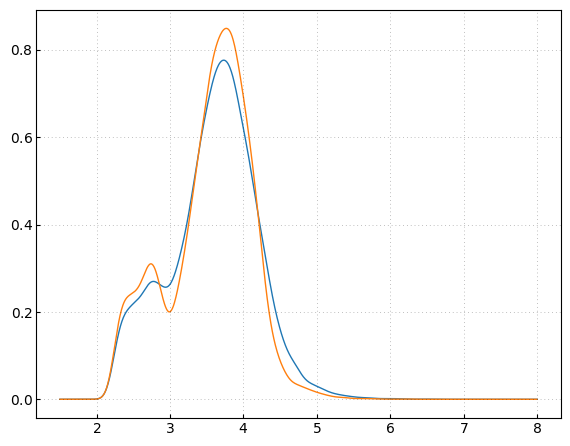

In [10]:
mass_h = np.loadtxt("mass_hs_data.txt")
mass_l = np.loadtxt("mass_ls_data.txt")
plt.plot(mass_h[:,0],mass_h[:,1])
plt.plot(mass_l[:,0],mass_l[:,1])